<a href="https://colab.research.google.com/github/Rohan171819/Deep_Learning./blob/main/Back_Propagation_Classification_Using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np

In [15]:
Data=pd.DataFrame([[8,8,1],[7,9,1],[6,10,0],[5,5,0]],columns=["iq","resume_score","placement"])
Data

,iq,resume_score,placement
0,8,8,1
1,7,9,1
2,6,10,0
3,5,5,0


In [16]:
X=Data[["iq","resume_score"]]
Y=Data[["placement"]]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=10)

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:
# Creating the Architecture...
model=Sequential()
model.add(Dense(3,activation="sigmoid",input_dim=2))
model.add(Dense(1,activation="sigmoid"))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.get_weights()

[array([[ 0.59695506,  0.8289597 ,  0.47424793],
        [ 0.59787095, -0.12304032, -0.65055037]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.5230739],
        [-0.3050331],
        [-0.9543543]], dtype=float32),
 array([0.], dtype=float32)]

In [21]:
new_weights=[np.array([[ 0.1 , 0.1 , 0.1 ],
        [0.1, 0.1 ,  0.1]], dtype=np.float32),
 np.array([0. ,  0. ,  0.], dtype=np.float32),
 np.array([[ 0.1 ],
        [0.1],
        [0.1]], dtype=np.float32),
 np.array([0.], dtype=np.float32)]

In [22]:
model.set_weights(new_weights)

In [23]:
optimizer=keras.optimizers.Adam(learning_rate=0.0001)

In [28]:
# Compiling the Model...
model.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=['accuracy'])

In [29]:
# Training my model...
history=model.fit(X_train,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.6925 - accuracy: 0.5000 - val_loss: 0.5763 - val_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 0.6924 - accuracy: 0.5000 - val_loss: 0.5765 - val_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 43ms/step - loss: 0.6924 - accuracy: 0.5000 - val_loss: 0.5767 - val_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 31ms/step - loss: 0.6924 - accuracy: 0.5000 - val_loss: 0.5768 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 31ms/step - loss: 0.6924 - accuracy: 0.5000 - val_loss: 0.5770 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 0.6924 - accuracy: 0.5000 - val_loss: 0.5772 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 46ms/step - loss: 0.6924 - accuracy: 0.5000 - val_loss: 0.5774 - val_accuracy: 1.0000
Epoch 8/100
1/1 [=====

In [30]:
Y_predicted=model.predict(X_test)

1/1 [==============================] - 0s 71ms/step


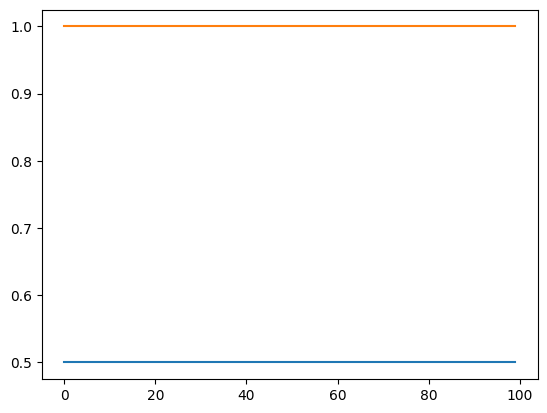

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

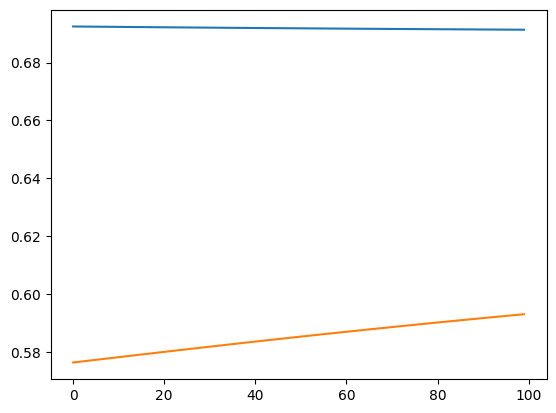

In [32]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()